# 1. Black–Scholes model assumptions
1. Black–Scholes model assumptions

We consider a financial market with:

- A risk free asset $B_t$ that grows deterministically:
  $
    B_t = e^{rt}, \quad r \text{ is constant}.
  $

- A risky asset (stock) $S_t$ that follows geometric Brownian motion under the physical measure:
  $
    dS_t = \mu S_t \, dt + \sigma S_t \, dW_t,
  $
  where:
  - $ \mu $ is the (real-world) drift,
  - $ \sigma > 0 $ is the volatility,
  - $ W_t $ is a standard Brownian motion.

Assumptions:

1. Trading is continuous, frictionless, no transaction costs or taxes.
2. Assets are perfectly divisible, borrowing and lending at rate $ r $.
3. No arbitrage opportunities.
4. Short selling is allowed.
5. Volatility $\sigma$ and rate $ r $ are constant.
6. The underlying pays no dividends.

We want to price a European call and put written on $ S_t $, with maturity $ T $ and strike $ K $.
The call payoff is:
$
  C_T = \max(S_T - K, 0),
$
and the put payoff is:
$
  P_T = \max(K - S_T, 0).
$


# 2. Geometric Brownian motion and solution for $ S_t $

Given the SDE:
$
  dS_t = \mu S_t \, dt + \sigma S_t \, dW_t,
$
we can write it for $ \ln S_t $ using Ito's lemma (or just recognise it as a linear SDE).

Let $ X_t = \ln S_t $.
Apply Ito to $ f(S_t) = \ln S_t $:
$
  df = f'(S_t)\,dS_t + \frac{1}{2} f''(S_t) (dS_t)^2.
$

We have:
$
  f'(s) = \frac{1}{s}, \quad f''(s) = -\frac{1}{s^2}.
$

Plugging into the SDE:

$
\begin{aligned}
  dX_t &= \frac{1}{S_t} (\mu S_t\,dt + \sigma S_t\,dW_t)
         + \frac{1}{2}\left(-\frac{1}{S_t^2}\right) (\sigma^2 S_t^2 dt) \\
       &= \mu\,dt + \sigma\,dW_t - \frac{1}{2}\sigma^2 dt \\
       &= \left(\mu - \frac{1}{2}\sigma^2\right)dt + \sigma dW_t.
\end{aligned}
$

This is a normal process with solution:
$
  X_t = X_0 + \left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma W_t,
$
so
$
  S_t = S_0 \exp\Big( \left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma W_t \Big).
$

Thus $ S_t $ is lognormal, which is one of the key ingredients behind the Black–Scholes formula.


# 3. Ito's lemma for the option price $ V(S,t) $

Let $ V(S,t) $ be the price of a derivative written on $ S_t $ (for example a call).  
We assume $ V $ is twice continuously differentiable in $ S $ and once in $ t $.

Apply Ito's lemma to $ V(S_t, t) $:

$
  dV = \frac{\partial V}{\partial t} dt
      + \frac{\partial V}{\partial S} dS_t
      + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} (dS_t)^2.
$

We know $ dS_t = \mu S_t\,dt + \sigma S_t\,dW_t $ and $ (dW_t)^2 = dt $.  
So $ (dS_t)^2 = \sigma^2 S_t^2 dt $.

Substitute:

$
\begin{aligned}
  dV &= V_t\,dt + V_S (\mu S_t\,dt + \sigma S_t\,dW_t)
        + \frac{1}{2} V_{SS} \sigma^2 S_t^2 dt \\
     &= \left[ V_t + \mu S_t V_S + \frac{1}{2}\sigma^2 S_t^2 V_{SS} \right] dt
        + \sigma S_t V_S dW_t.
\end{aligned}
$

So the dynamics of the option price under the physical measure are:

$
  dV = \text{drift} \cdot dt + \text{diffusion} \cdot dW_t
$
with
- drift: $ V_t + \mu S_t V_S + \frac{1}{2}\sigma^2 S_t^2 V_{SS} $,
- diffusion: $ \sigma S_t V_S $.


# 4. Delta-hedged portfolio and the Black–Scholes PDE

We construct a **self-financing portfolio** composed of:
- Long one option with price $ V(S,t) $,
- Short $ \Delta $ units of the stock $ S_t $.

Portfolio value:
$
  \Pi_t = V(S_t, t) - \Delta S_t.
$

Portfolio dynamics:
$
  d\Pi_t = dV_t - \Delta dS_t.
$

Use the expressions for $ dV_t $ and $ dS_t $:

$
\begin{aligned}
  d\Pi_t
  &= \left[ V_t + \mu S_t V_S + \frac{1}{2}\sigma^2 S_t^2 V_{SS} \right] dt
     + \sigma S_t V_S dW_t
     - \Delta \left( \mu S_t dt + \sigma S_t dW_t \right).
\end{aligned}
$

Group the $ dW_t $ terms:

$
  \text{diffusion term} = \left( \sigma S_t V_S - \Delta \sigma S_t \right) dW_t
                        = \sigma S_t (V_S - \Delta) dW_t.
$

Choose
$
  \Delta = V_S
$
so that the diffusion term disappears.  
The portfolio becomes **locally riskless** (no Brownian term).

Then

$
\begin{aligned}
  d\Pi_t
  &= \left[ V_t + \mu S_t V_S + \frac{1}{2}\sigma^2 S_t^2 V_{SS} - \Delta \mu S_t \right] dt \\
  &= \left[ V_t + \mu S_t V_S + \frac{1}{2}\sigma^2 S_t^2 V_{SS} - \mu S_t V_S \right] dt \\
  &= \left[ V_t + \frac{1}{2}\sigma^2 S_t^2 V_{SS} \right] dt.
\end{aligned}
$

Since the portfolio is instantaneously riskless, **no arbitrage** implies it must earn the risk free rate $ r $:

$
  d\Pi_t = r \Pi_t dt = r (V_t - \Delta S_t) dt = r (V - S_t V_S) dt.
$

Equate the two expressions:

$
  V_t + \frac{1}{2}\sigma^2 S_t^2 V_{SS}
  = r (V - S_t V_S).
$

Rearrange:

$
  V_t + \frac{1}{2}\sigma^2 S^2 V_{SS} + r S V_S - r V = 0.
$

This is the **Black–Scholes partial differential equation**:

$
  \boxed{
    V_t + \frac{1}{2}\sigma^2 S^2 V_{SS} + r S V_S - r V = 0
  }
$

For a European call option the terminal condition at maturity $ T $ is:

$
  V(S, T) = \max(S - K, 0).
$


# 5. Solving the Black–Scholes PDE

We want to solve:
$
  V_t + \frac{1}{2}\sigma^2 S^2 V_{SS} + r S V_S - r V = 0,
$
with terminal condition
$
  V(S, T) = \max(S - K, 0).
$

We use a standard sequence of transformations to reduce this PDE to the heat equation.

1. Change time direction:
   Let $ \tau = T - t $. Then $ V_t = -V_{\tau} $.

2. Non-dimensionalise the stock:
   Let $ x = \ln\left(\frac{S}{K}\right) $.

3. Rescale the function:
   Define
   $
      V(S,t) = K e^{-r\tau} u(x, \tau).
   $

After some algebra (substituting derivatives and simplifying) the PDE for $ u(x,\tau) $ becomes a standard heat equation:

$
  u_{\tau} = \frac{1}{2}\sigma^2 u_{xx},
$
with an appropriate initial condition derived from the payoff.

The initial condition at $ \tau = 0 $ (which is $ t = T $):

$
  V(S,T) = \max(S-K, 0)
  \quad \Rightarrow \quad
  u(x, 0) = \max(e^x - 1, 0).
$

The heat equation with that initial condition has a known solution that can be expressed as a convolution with the normal density. After reversing all the transformations, we obtain the **Black–Scholes closed form** for a European call:

$
  C(S_0, K, r, \sigma, T) = S_0 N(d_1) - K e^{-rT} N(d_2),
$
where
$
  d_1 = \frac{\ln(S_0 / K) + (r + \tfrac{1}{2}\sigma^2) T}{\sigma \sqrt{T}}, \quad
  d_2 = d_1 - \sigma \sqrt{T},
$
and $ N(\cdot) $ is the standard normal cumulative distribution function.

This formula already incorporates the risk neutral measure:
in a risk neutral world the stock drift is $ r $, not $ \mu $, which is why $ r $ appears in $ d_1 $.
The PDE derivation is another way of enforcing risk neutrality via no-arbitrage and replication.


# 6. European put price and put–call parity

The European put can be obtained in two ways:

1. Solve the same PDE with payoff $ \max(K - S, 0) $.
2. Use **put–call parity**.

Put–call parity for non-dividend-paying stocks:

$
  C - P = S_0 - K e^{-rT}.
$

Given the call price $ C $, the put price is:

$
  P = C - S_0 + K e^{-rT}.
$

Substituting the Black–Scholes formula for $ C $ and simplifying gives the closed form for the put:

$
  P(S_0, K, r, \sigma, T)
    = K e^{-rT} N(-d_2) - S_0 N(-d_1),
$
with the same $ d_1, d_2 $ as before.


In [1]:
import math
from dataclasses import dataclass
from typing import Literal
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import random

OptionType = Literal["call", "put"]

def norm_cdf(x: float) -> float:
    return 0.5 * (1 + math.erf(x / math.sqrt(2.0)))

def d1_d2(S: float, K: float, T: float, r: float, sigma: float):
    if T <= 0:
        raise ValueError("T must be positive for BS formula")
    if sigma <= 0:
        raise ValueError("sigma must be positive for BS formula")
    num = math.log(S / K) + (r + 0.5 * sigma**2) * T
    den = sigma * math.sqrt(T)
    d1 = num / den
    d2 = d1 - sigma * math.sqrt(T)
    return d1, d2

def bs_price(S, K, T, r, sigma, opt_type):
    if T <= 0:
        return max(S - K, 0) if opt_type == "call" else max(K - S, 0)
    if sigma <= 0:
        return max(S - K, 0) if opt_type == "call" else max(K - S, 0)
    d1, d2 = d1_d2(S, K, T, r, sigma)
    if opt_type == "call":
        return S * norm_cdf(d1) - K * math.exp(-r*T) * norm_cdf(d2)
    else:
        return K * math.exp(-r*T) * norm_cdf(-d2) - S * norm_cdf(-d1)

def bs_greeks(S: float, K: float, T: float, r: float, sigma: float, opt_type: OptionType):
    d1, d2 = d1_d2(S, K, T, r, sigma)
    pdf = math.exp(-0.5 * d1**2) / math.sqrt(2 * math.pi)
    if opt_type == "call":
        delta = norm_cdf(d1)
        theta = (-S * pdf * sigma / (2 * math.sqrt(T)) - r * K * math.exp(-r*T) * norm_cdf(d2))
        rho = K * T * math.exp(-r*T) * norm_cdf(d2)
    else:
        delta = norm_cdf(d1) - 1
        theta = (-S * pdf * sigma / (2 * math.sqrt(T)) + r * K * math.exp(-r*T) * norm_cdf(-d2))
        rho = -K * T * math.exp(-r*T) * norm_cdf(-d2)
    gamma = pdf / (S * sigma * math.sqrt(T))
    vega = S * pdf * math.sqrt(T)
    return {
        "delta": delta,
        "gamma": gamma,
        "vega": vega,
        "theta": theta,
        "rho": rho,
    }


# Monte Carlo Simulation for European Options in Python

## What is a Monte Carlo Simulation?
Monte Carlo simulation is a **numerical method** used to approximate the value of financial instruments by simulating the underlying asset's price path many times. In the context of European options, we use this to estimate the expected payoff under risk-neutral conditions and then discount it back to the present.

It’s especially useful when analytical formulas are hard or impossible to use—like with path-dependent or exotic derivatives. But we can also use it for standard options to compare results with Black–Scholes.

---

## What are we simulating?
We simulate the evolution of the stock price \\( S_t \\) using Geometric Brownian Motion (GBM) under the risk-neutral measure:

\\[
S_t = S_0 \cdot \exp\left( \left( r - \frac{1}{2} \sigma^2 \right)t + \sigma W_t \right)
\\]

Where:
- \\( S_0 \\): initial stock price  
- \\( r \\): risk-free rate  
- \\( \\sigma \\): volatility of the underlying  
- \\( W_t \\): Brownian motion (simulated using standard normals)  
- \\( t \\): time in years  

Each simulation path produces a possible trajectory of the stock until maturity \\( T \\).

---

## European Option Payoffs
At maturity \\( T \\), we calculate:

- **Call Option**: \\( \\max(S_T - K, 0) \\)  
- **Put Option**: \\( \\max(K - S_T, 0) \\)  

We then discount the payoff to present value:

\\[
\text{Discounted Payoff} = e^{-rT} \cdot \text{Payoff}
\\]

The Monte Carlo estimate of the option price is the average of all discounted payoffs:

\\[
\text{Option Price} \approx \frac{1}{N} \sum_{i=1}^{N} e^{-rT} \cdot \text{Payoff}_i
\\]

Where \\( N \\) is the number of simulations.

---

## Why use Monte Carlo when we have Black–Scholes?
The Black–Scholes formula gives a closed-form solution for European options, assuming constant volatility and a lognormal price distribution:

\\[
C = S_0 N(d_1) - K e^{-rT} N(d_2)
\\]

With:

\\[
d_1 = \frac{\ln(S_0 / K) + (r + \sigma^2 / 2)T}{\sigma \sqrt{T}}, \quad d_2 = d_1 - \sigma \sqrt{T}
\\]

But Monte Carlo has advantages:
- Works even when no closed-form solution exists (e.g. exotic or path-dependent options)
- Easily extended to multi-asset or multi-factor models
- Used in risk analytics like Value-at-Risk (VaR)
- Can approximate Greeks via finite difference method

So while slower, it is more flexible and realistic for complex pricing tasks.

---

## Why do we use approximations?
Because closed-form formulas:
- Only work under strict assumptions (constant volatility, no jumps, etc.)
- Don’t scale to real-world products (Asian, barrier, lookback options, etc.)

Monte Carlo lets us model complex situations by sampling the probability space. As \\( N \\to \\infty \\), the law of large numbers ensures the estimate converges to the true expected value.

---

## Visualizing the Paths
Our Python script:
- Simulates 1000 price paths using GBM
- Displays two subplots: one for a call, one for a put option
- Plots histograms of payoffs to visualize distribution

This helps illustrate how randomness affects final payoff distributions and the usefulness of simulation.

---

## Summary
Monte Carlo is a powerful and flexible method to price options—especially when no analytic solution exists. Even for simple European calls and puts, it gives us insight into:

- The randomness of asset prices
- The distribution of payoffs
- How option pricing works in practice

It’s slow, but it’s real. And in quant finance, that’s often what you need.

   Final Price  Call Payoff  Put Payoff
0    84.176073     0.000000   15.052185
1   114.930073    14.201925    0.000000
2    95.697713     0.000000    4.092462
3    94.693360     0.000000    5.047832
4    90.041072     0.000000    9.473226
5   114.777200    14.056508    0.000000
6   119.650185    18.691834    0.000000
7   104.162860     3.959835    0.000000
8   121.114995    20.085205    0.000000
9   113.339541    12.688964    0.000000


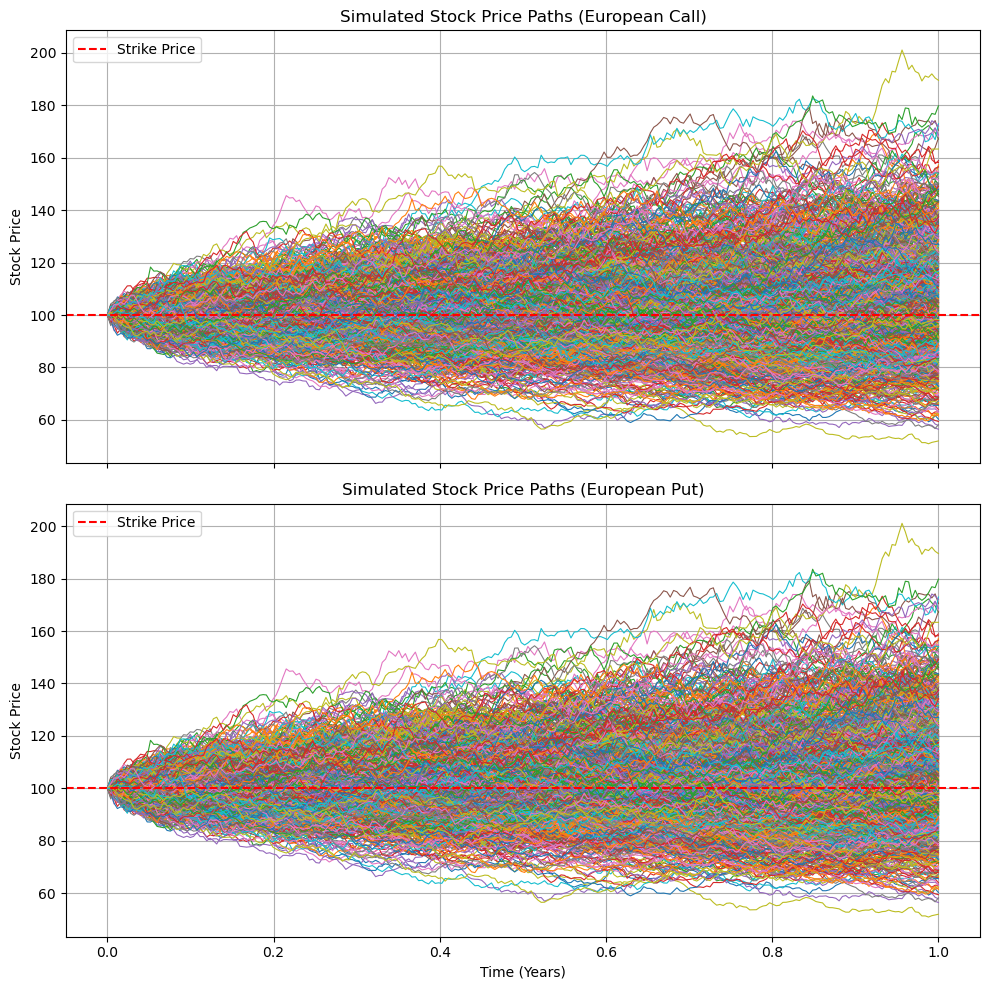

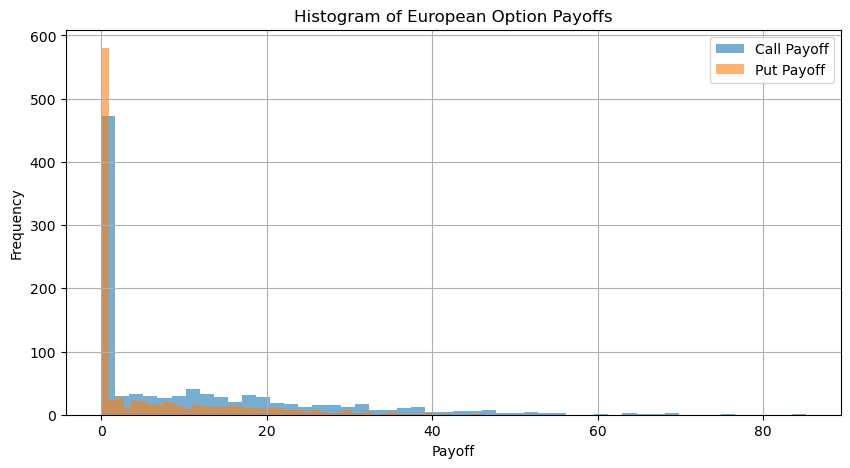

In [2]:

# ------------------- MONTE CARLO SIMULATION -------------------

# Parameters
S0 = 100       # Initial stock price
K = 100        # Strike price
T = 1.0        # Time to maturity (in years)
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility
n_simulations = 1000
n_steps = 252

dt = T / n_steps
time_grid = np.linspace(0, T, n_steps)

Z = np.random.standard_normal((n_simulations, n_steps))
S = np.zeros_like(Z)
S[:, 0] = S0

for t in range(1, n_steps):
    S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t])

S_T = S[:, -1]
call_payoff = np.exp(-r * T) * np.maximum(S_T - K, 0)
put_payoff = np.exp(-r * T) * np.maximum(K - S_T, 0)

# Create DataFrame
payoffs_df = pd.DataFrame({
    'Final Price': S_T,
    'Call Payoff': call_payoff,
    'Put Payoff': put_payoff
})

# Output preview
print(payoffs_df.head(10))

# Plot sample paths - combined into one figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
for i in range(n_simulations):
    ax1.plot(time_grid, S[i], lw=0.8)
ax1.axhline(K, color='red', linestyle='--', label='Strike Price')
ax1.set_title("Simulated Stock Price Paths (European Call)")
ax1.set_ylabel("Stock Price")
ax1.grid(True)
ax1.legend()

for i in range(n_simulations):
    ax2.plot(time_grid, S[i], lw=0.8)
ax2.axhline(K, color='red', linestyle='--', label='Strike Price')
ax2.set_title("Simulated Stock Price Paths (European Put)")
ax2.set_xlabel("Time (Years)")
ax2.set_ylabel("Stock Price")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Histogram of payoffs
plt.figure(figsize=(10, 5))
plt.hist(call_payoff, bins=50, alpha=0.6, label='Call Payoff')
plt.hist(put_payoff, bins=50, alpha=0.6, label='Put Payoff')
plt.title("Histogram of European Option Payoffs")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Compute Results

S_T = S[:, -1]
call_payoffs = np.exp(-r * T) * np.maximum(S_T - K, 0)
put_payoffs = np.exp(-r * T) * np.maximum(K - S_T, 0)

bs_call = bs_price(S0, K, T, r, sigma, "call")
bs_put = bs_price(S0, K, T, r, sigma, "put")

mc_call = np.mean(call_payoffs)
mc_put = np.mean(put_payoffs)

call_std = np.std(call_payoffs)
put_std = np.std(put_payoffs)

call_greeks = bs_greeks(S0, K, T, r, sigma, "call")
put_greeks = bs_greeks(S0, K, T, r, sigma, "put")

# Print Summary
print("--- Option Pricing and Risk Metrics ---")
print(f"Black-Scholes Call Price: {bs_call:.4f}")
print(f"Black-Scholes Put Price:  {bs_put:.4f}")
print(f"Monte Carlo Call Estimate: {mc_call:.4f} (StdDev: {call_std:.4f})")
print(f"Monte Carlo Put Estimate:  {mc_put:.4f} (StdDev: {put_std:.4f})")

print("\nCall Greeks:")
for k, v in call_greeks.items():
    print(f"  {k.capitalize()}: {v:.4f}")

print("\nPut Greeks:")
for k, v in put_greeks.items():
    print(f"  {k.capitalize()}: {v:.4f}")


--- Option Pricing and Risk Metrics ---
Black-Scholes Call Price: 10.4506
Black-Scholes Put Price:  5.5735
Monte Carlo Call Estimate: 10.4645 (StdDev: 14.2529)
Monte Carlo Put Estimate:  5.5841 (StdDev: 8.8459)

Call Greeks:
  Delta: 0.6368
  Gamma: 0.0188
  Vega: 37.5240
  Theta: -6.4140
  Rho: 53.2325

Put Greeks:
  Delta: -0.3632
  Gamma: 0.0188
  Vega: 37.5240
  Theta: -1.6579
  Rho: -41.8905
